In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.janestreet.com/puzzles/number-cross-4-updated.PNG", width=500, height=500)


"The 11-by-11 grid above has been divided into various regions. Shade some of the cells black, then place digits (0-9) into the remaining cells. Shading must be “sparse”: that is, no two shaded cells may share an edge.

Every cell within a region must contain the same digit, and orthogonally adjacent cells in different regions must have different digits. (Note that shading cells may break up regions or change which pairs of regions are adjacent. See the example, below.)

Each row has been supplied with a clue. Every number formed by concatenating consecutive groups of unshaded cells within a row must satisfy the clue given for the row. (As in the example.) Numbers must be at least two digits long and may not begin with a 0.

The answer to this month’s puzzle is the sum of all the numbers formed in the completed grid. (As in the example.)"


In [6]:
import numpy as np
import math
import time
from SortedSet.sorted_set import SortedSet
import matplotlib.pyplot as plt
import seaborn as sns


global prime_powers
global fibonacci_numbers
global powers_7



def output(regions,fixed):
    #Print output grid, given example
    N=regions.shape[0]
    fig,ax = plt.subplots(1,1,figsize=(N/2.5,N/2.5))    
    x = np.array((fixed).astype('int').astype('str'))
    x[x=="-1"] ="-"
    ax =sns.heatmap(regions,annot=x,cbar=False,cmap='tab20',fmt="",
                    linewidths=1,linecolor="k",annot_kws={"size":N**0.5*3,"color":"k"})
    ax.tick_params(left=False, bottom=False,labelleft=True, labelright=False,labeltop=False,labelbottom=True)
    plt.xticks(rotation=0,fontsize =N**0.5*4)
    plt.yticks(rotation=0,fontsize =N**0.5*4)
    plt.tight_layout()
    plt.show()

def calculate_result(grid):
    # Calculate result, given grid
    nums=''.join([''.join(str(num) for num in grid[i])+"-1" for i in range(grid.shape[0])])
    nums=[int(x) for x in nums.split("-1") if x]
    print("result is : ",np.sum(nums))
    print(nums)


def calculate_primes(n):
    # Function to calculate primes up to n and return them
    primes = set()
    for num in range(2, int(math.sqrt(n)+1)):
        is_prime = True
        # Check divisibility by all primes found so far
        limit = num/2 + 1
        for prime in primes:
            if prime > limit:
                break
            if num % prime == 0:
                is_prime = False
                break
        if is_prime:
            primes.add(num)
    primes=SortedSet(primes)
    return primes

def find_prime_powers(n):
    # Find all prime powers up to n using previously calculated primes
    primes = calculate_primes(n)  # First calculate all primes up to n
    prime_powers = set()

    # Calculate prime powers for each prime
    for p in primes:
        for p2 in primes:
            number=p**p2
            if number <n:
                prime_powers.add(number)
            else: 
                break
    return prime_powers

def find_fibonacci(n):
    # Generate Fibonacci sequence up to the n-th Fibonacci number
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    
    # Start the sequence with the first two Fibonacci numbers
    fibs = [0, 1]
    
    # Generate the sequence iteratively
    while fibs[-1]<n:
        # The next Fibonacci number is the sum of the two preceding ones
        next_fib = fibs[-1] + fibs[-2]
        fibs.append(next_fib)
    return set(fibs)

def is_cube(n):
    # Return True if n is a perfect cube, else False
    if n < 0:  # Adjust for negative numbers
        n = -n
    # Calculate the cube root of the absolute value of n
    cube_root = round(n ** (1/3))
    # Check if the cube of the cube root equals the original number
    return cube_root**3 == n

def is_palindrome(num):
    # Palindrome function
    s = str(num)
    return s == s[::-1]

max=100000000000
prime_powers=find_prime_powers(max)
fibonacci_numbers=find_fibonacci(max)



In [7]:

def validate_row(grid,regions, x, y,num,N):
    # Function to validate numbers as they are formed/finalized
    nums=[]
    if y==0:
        return True
    if y==N-1 and num!=-1:
        # If row ended and the last space isnt empty
        nums=[num]
    for j in range(y-1,-1,-1):
        # Iteratively add numbers until we reach the start of the row or an empty space
        if grid[x][j]==-1:
            break
        nums.append(grid[x][j])

    nums=nums[::-1]


    # Here we verify if the number formed matches the row rule for each row
    if x==0 or x==5:
        # First and sixth lines. We want squares.
        i=int(''.join(str(num) for num in nums))
        return i == math.isqrt(i) ** 2
    elif x==1:
        # Second line. 1 more than a palindrome.
        i=int(''.join(str(num) for num in nums))
        return is_palindrome(i-1)
    elif x==2:
        # Third line, prime raised to a prime power.
        i=int(''.join(str(num) for num in nums))
        return i in prime_powers
    elif x==3:
        # Fourth line, sum must be 7
        return sum(nums)==7
    elif x==4:
        # Fifth line, fibonacci numbers
        i=int(''.join(str(num) for num in nums))
        return i in fibonacci_numbers
    elif x==6:
        # Seventh line, multiple of 37
        i=int(''.join(str(num) for num in nums))
        return i %37==0
    elif x==7:
        # Eigth line, palindrome and multiple of 23
        i=int(''.join(str(num) for num in nums))
        return (i %23==0) and (is_palindrome(i))
    elif x==8:
        # Ninth line, product of digits ends in 1.
        return str(np.prod(nums))[-1]=="1"
    elif x==9:
        # Tenth line, multiple of 88
        i=int(''.join(str(num) for num in nums))
        return i %88==0
    elif x==10:
        # Eleventh line, 1 less than a palindrome
        i=int(''.join(str(num) for num in nums))
        return is_palindrome(i+1)

def validate(grid,regions, x, y,num,N,invalid,n):
    """Recursive interacts with Puzzle function. Validates if a number is valid, handles support structures operations and propagates recursion

    Parameters
    ----------
    grid : numpy array
        The grid being filled - We reuse the same grid and use a recursive approach to save memory
    regions : numpy array
        Contains an array where each index has an integer corresponding to it's region index
    x: int
        Row index
    y: int
        Column number
    num: int
        The added integer
    N: int
        Grid length
    invalid: numpy array
        This structure keeps illegal positions for each position, and is updated recursively.
        It is used to optimize action validation
    n: int
        number of rows we have iterated. 
        When testing I wanted to find rows in arbitrary custom orders, so I added behaviour to set custom row orderings when finding solutions.
    """
    if (num==-1 and y !=0) or y==N-1:
        # If we added a space or ended the row, validate the number formed
        if not validate_row(grid,regions, x, y,num,N):
            return False
    if num==-1:
        # If we are adding a space
        for index in [(i+x,j+y) for i,j in [(1,0),(0,1),(0,2)]if i+x >=0 and i+x <N and j+y >=0 and j+y <N]:
            # Add space to invalid of adjacent cells since we cant have spaces together
            invalid[index[0]][index[1]][num+1]+=1
        if y<N-1:
            # Next number can't start with a 0
            invalid[x,y+1][1]+=1
        if puzzle(regions,grid, x, y+1,N,n,invalid):
            return True
        else:
            for index in [(i+x,j+y) for i,j in [(1,0),(0,1),(0,2)]if i+x >=0 and i+x <N and j+y >=0 and j+y <N]:
                invalid[index[0]][index[1]][num+1]-=1
            if y<N-1:
                invalid[x][y+1][1]-=1

    else:
        indices=[(i+x,j+y) for i,j in [(-1,0),(0,-1),(1,0),(0,1)] if i+x >=0 and i+x <N and j+y >=0 and j+y <N and (regions[i+x,j+y]==regions[x,y])]
        for index in indices:
            # Add invalid cells according to same region rules
            invalid[index[0]][index[1]]+=1
            invalid[index[0]][index[1]][num+1]-=1
            invalid[index[0]][index[1]][0]-=1

        indices_diff=[(i+x,j+y) for i,j in [(-1,0),(0,-1),(1,0),(0,1)] if i+x >=0 and i+x <N and j+y >=0 and j+y <N and (regions[i+x,j+y]!=regions[x,y])]
        for index in indices_diff:
            # Add invalid cells according to different region rules
            invalid[index[0]][index[1]][num+1]+=1

        if puzzle(regions,grid, x, y+1,N,n,invalid):
            return True
        else:
            # Return invalid array pre recursive state
            for index in indices:
                invalid[index[0]][index[1]]-=1
                invalid[index[0]][index[1]][num+1]+=1
                invalid[index[0]][index[1]][0]+=1
            for index in indices_diff:
                invalid[index[0]][index[1]][num+1]-=1

    return False 
    

    
 
def puzzle(regions,grid, row, col,N,n,invalid=None):
    if col==0 and n==0:
        # If starting
        invalid= np.empty((regions.shape[0],regions.shape[1],11),dtype = int)
        for x in range(N):
            for j in range(N):
                invalid[x][j]=np.array([0 for x in range(11)])
        invalid[:,1,0]=1
        invalid[:,0,1]=1
        invalid[:,-2,0]=1
    
    if (n == N - 1 and col == N):
        # Solution found
        return True
    if col == N:
        # Go for next row
        n += 1
        row=rows[n]
        col = 0
    for num in range(-1, 10, 1): 
        # Add some numbers
        if invalid[row][col][num+1]==0:
            # If number is valid action
            grid[row][col] = num
            if validate(grid,regions, row, col,num,N,invalid,n):   
                return True
            grid[row][col] = -100
    return False


1.8166468143463135


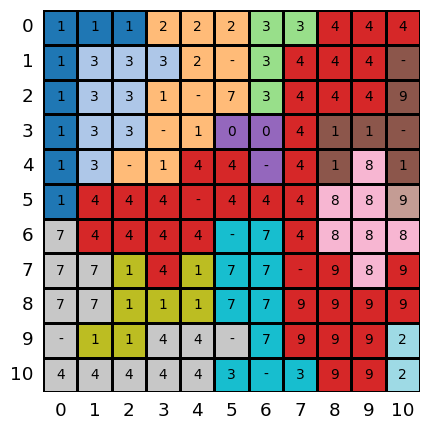

result is :  88243711283
[11122233444, 13332, 3444, 1331, 734449, 133, 100411, 13, 144, 4181, 1444, 444889, 74444, 74888, 7714177, 989, 77111779999, 1144, 79992, 444443, 3992]


In [8]:
regions=np.array([[1,1,1,3,3,3,4,4,5,5,5],
               [1,2,2,2,3,3,4,5,5,5,7],
               [1,2,2,3,3,3,4,5,5,5,7],
               [1,2,2,3,3,6,6,5,7,7,7],
               [1,2,3,3,5,5,6,5,7,9,7],
               [1,5,5,5,5,5,5,5,9,9,8],
               [10,5,5,5,5,12,12,5,9,9,9],
               [10,10,11,5,11,12,12,5,5,9,5],
               [10,10,11,11,11,12,12,5,5,5,5],
               [10,11,11,10,10,10,12,5,5,5,13],
               [10,10,10,10,10,12,12,12,5,5,13]])

regions=np.array(regions,dtype = int)
grid= np.empty(regions.shape,dtype = int)
grid[:] = -100

start=time.time()
rows=range(len(regions[0])) # Can be changed to change row fill order

if (puzzle(regions, grid,0, 0,len(regions[0]),0)):
    end = time.time()
    print(end - start)
    output(regions,grid)
    calculate_result(grid)
else:
    print("Solution does not exist:(")
    end = time.time()
    print(end - start)